In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-usr68xyg because the default path (/home/matmozaur/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',
                   index_col='date', parse_dates=True)

In [3]:
data

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-25,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-26,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-27,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-28,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,ZWE,Africa,Zimbabwe,38018.0,38.0,85.143,1555.0,0.0,0.714,2557.908,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
2021-04-23,ZWE,Africa,Zimbabwe,38045.0,27.0,73.000,1556.0,1.0,0.714,2559.725,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
2021-04-24,ZWE,Africa,Zimbabwe,38064.0,19.0,52.143,1556.0,0.0,0.571,2561.003,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
pd.set_option('display.max_columns', None)
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-25,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-26,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-27,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-28,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
data.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
 

In [6]:
columns = ['location', 'total_cases', 'new_cases', 'total_deaths',
           'new_deaths', 'total_cases_per_million', 'new_cases_per_million','total_deaths_per_million',
           'new_deaths_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
           'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate',
           'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
           'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
           'people_fully_vaccinated_per_hundred']

In [7]:
data=data[columns]

In [8]:
data.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
count,8.227600e+04,82274.000000,7.264400e+04,72802.000000,81831.000000,81829.000000,72212.000000,72370.000000,1276.000000,1276.000000,3.857500e+04,3.828800e+04,38288.000000,38575.000000,42500.000000,41907.000000,8.876000e+03,8.155000e+03,5.981000e+03,7.491000e+03,8876.000000,8155.000000,5981.000000
mean,8.096155e+05,5729.991297,2.268651e+04,137.917228,9860.702015,73.796649,221.176288,1.499913,3998.836697,115.143915,4.287416e+04,5.859740e+06,222.679187,1.847619,0.088929,160.012067,1.376049e+07,8.715690e+06,4.427519e+06,4.101899e+05,12.726400,8.986141,4.870361
std,5.604279e+06,35628.566754,1.340533e+05,751.757220,18957.186918,175.254142,388.539572,3.979489,11691.462666,231.539416,1.594560e+05,2.661265e+07,481.969737,5.338329,0.097663,868.390010,6.230320e+07,3.618547e+07,1.710011e+07,1.612160e+06,21.042993,13.487672,9.387907
min,1.000000e+00,-74347.000000,1.000000e+00,-1918.000000,0.001000,-2153.437000,0.001000,-76.445000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,9.110000e+02,2.000000,4.400000e+01,0.000000,198.882500,0.183000,6.794000,0.000000,59.182000,9.998750,1.421000e+03,1.224865e+05,11.029750,0.123000,0.016000,7.700000,6.020000e+04,5.111900e+04,2.538100e+04,3.240000e+03,0.990000,0.840000,0.400000
50%,1.016200e+04,69.000000,3.100000e+02,2.000000,1356.815000,7.538000,38.476500,0.119000,364.237000,43.642000,5.407000e+03,6.101000e+05,54.528000,0.546000,0.053000,18.300000,4.722925e+05,3.531420e+05,2.192980e+05,1.936700e+04,4.840000,3.610000,1.900000
75%,1.082985e+05,757.000000,3.012000e+03,17.000000,9716.442500,66.719000,236.517500,1.271000,1975.327500,129.535250,2.149350e+04,2.543594e+06,221.197500,1.759000,0.128000,57.400000,2.886703e+06,2.134233e+06,1.327463e+06,1.122055e+05,15.382500,11.235000,5.230000
max,1.478724e+08,899755.000000,3.120403e+06,17906.000000,169326.344000,8652.658000,2774.330000,218.329000,116374.000000,2656.911000,2.945871e+06,4.094132e+08,6074.075000,327.086000,0.742000,44258.700000,1.041768e+09,5.623243e+08,2.432690e+08,2.294972e+07,201.750000,106.770000,94.980000


In [9]:
def analyse_country(data, country):
    data_country = data[data['location']==country]
    data_country.drop('location', axis=1, inplace=True)
    for c in data_country.columns:
        try:
            print(c)
            plt.figure(figsize=(15,5))
            plt.plot(data_country[c], 'b.-')
            plt.grid()
            plt.show()
            print('\n\n')
        except:
            pass

total_cases


/home/matmozaur/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


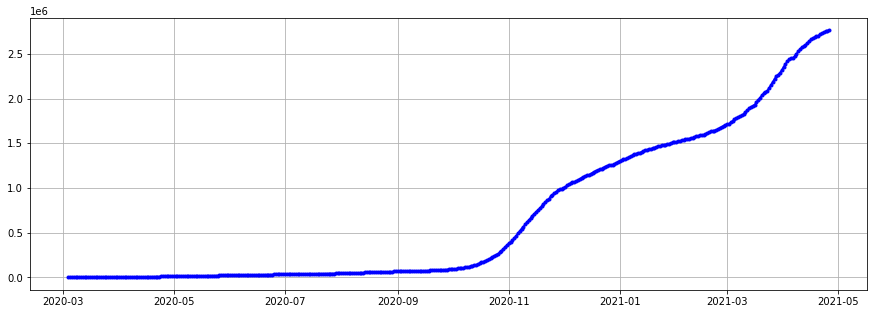




new_cases


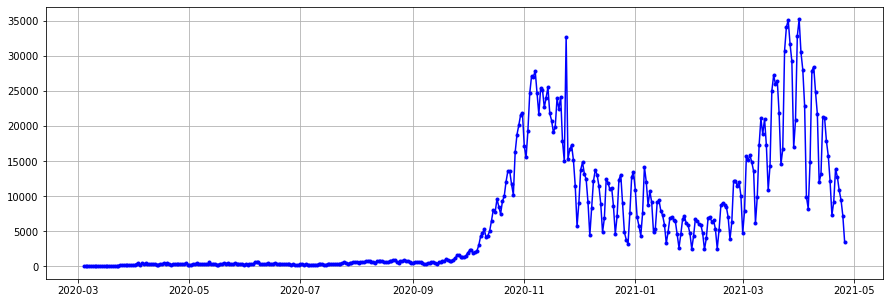




total_deaths


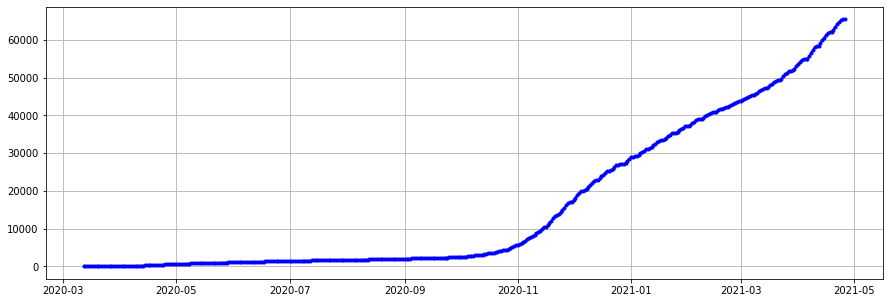




new_deaths


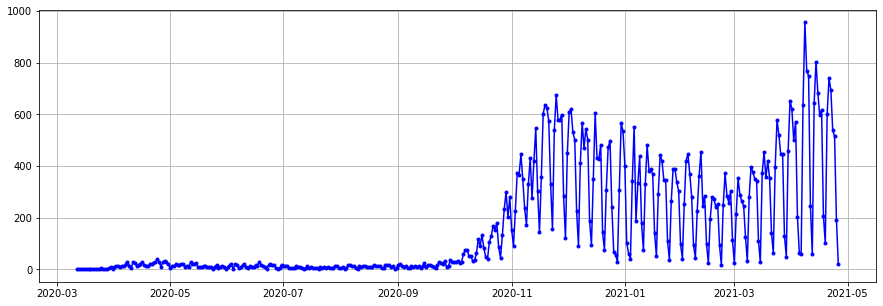




total_cases_per_million


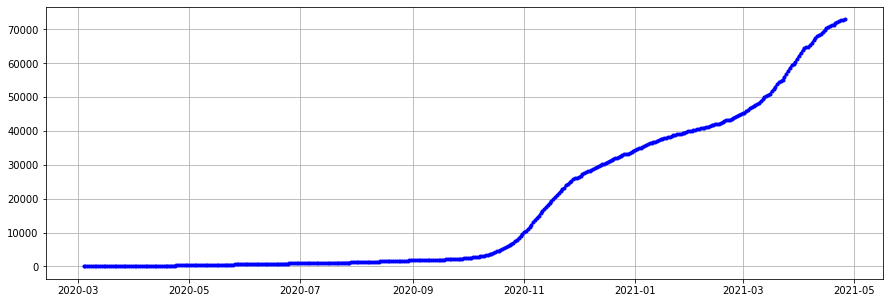




new_cases_per_million


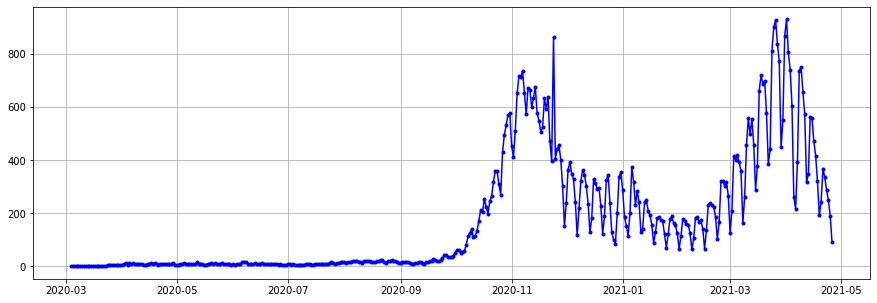




total_deaths_per_million


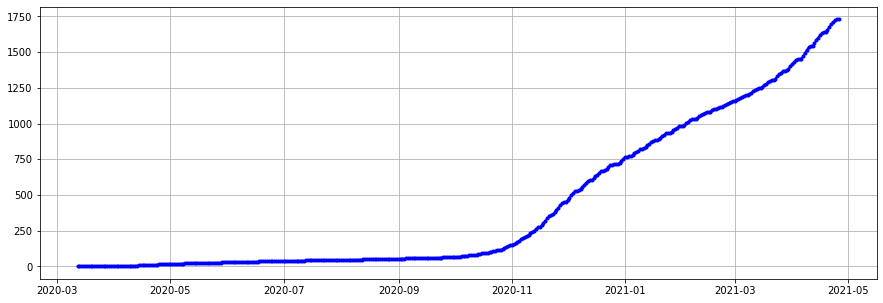




new_deaths_per_million


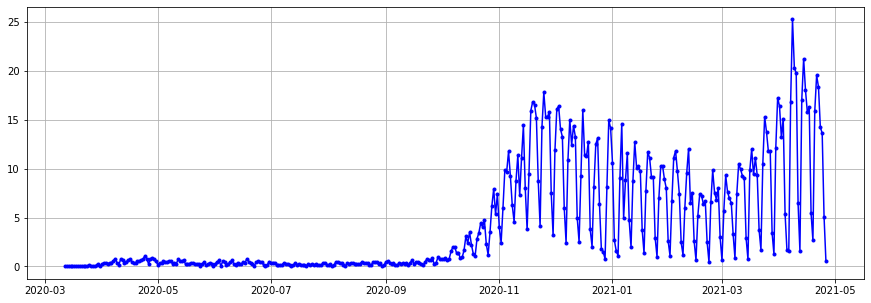




weekly_hosp_admissions


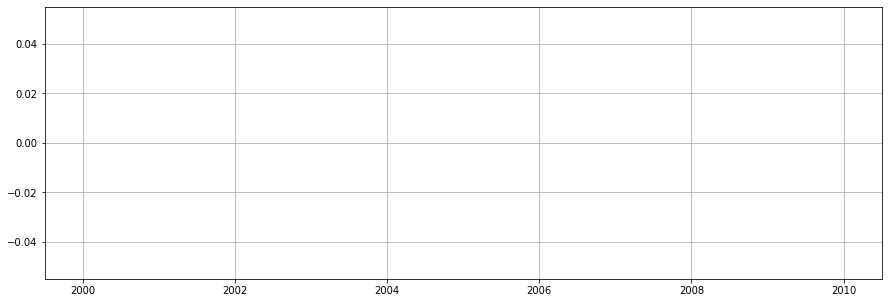




weekly_hosp_admissions_per_million


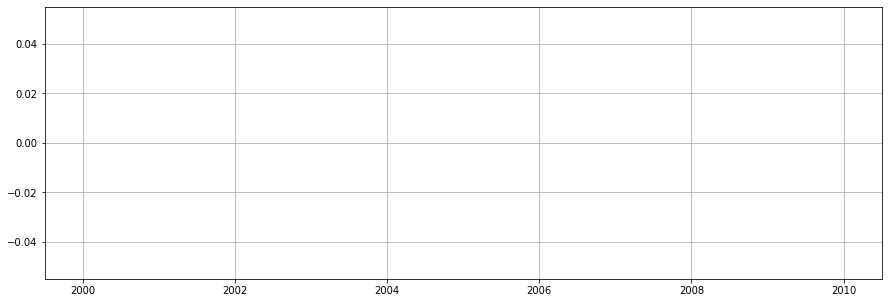




new_tests


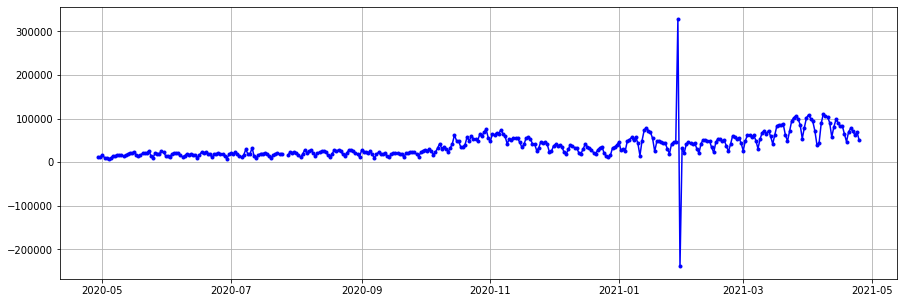




total_tests


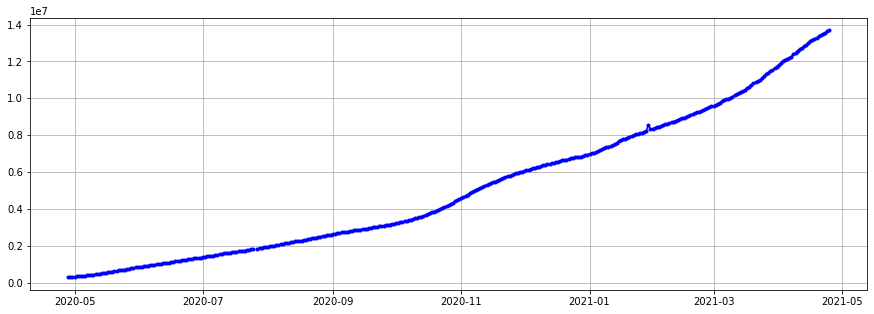




total_tests_per_thousand


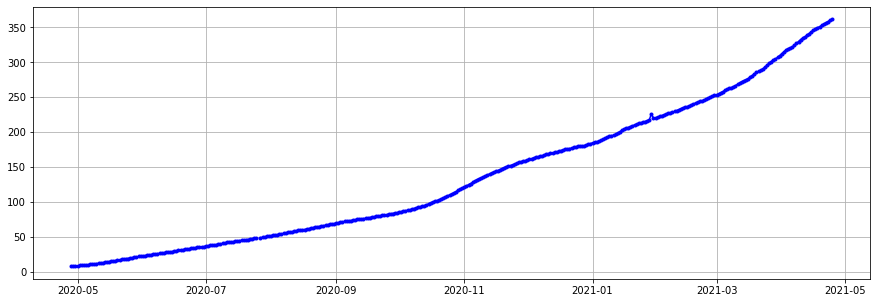




new_tests_per_thousand


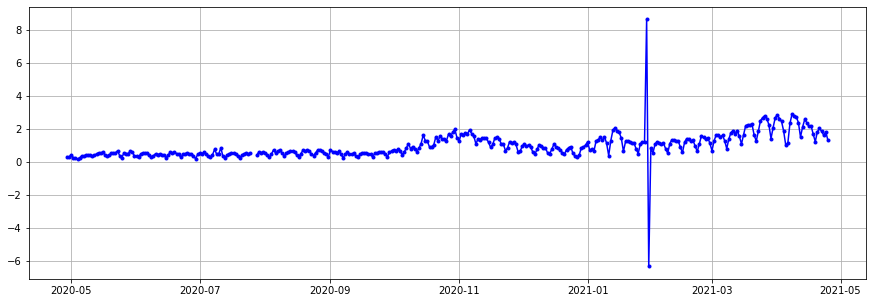




positive_rate


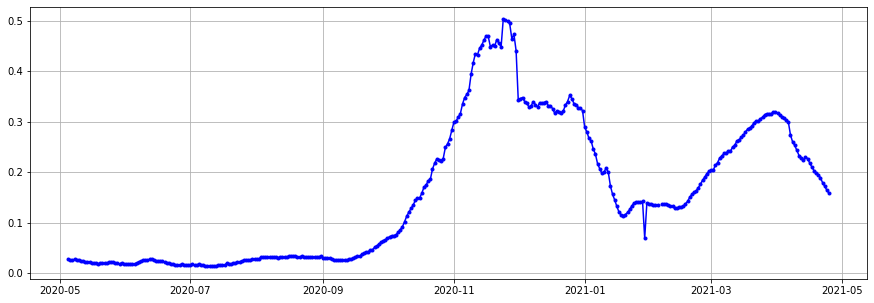




tests_per_case


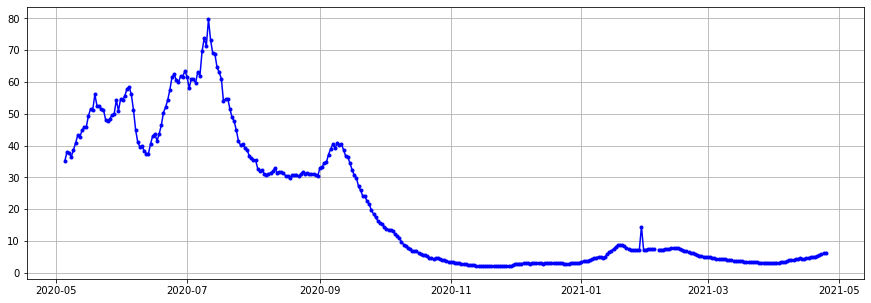




total_vaccinations


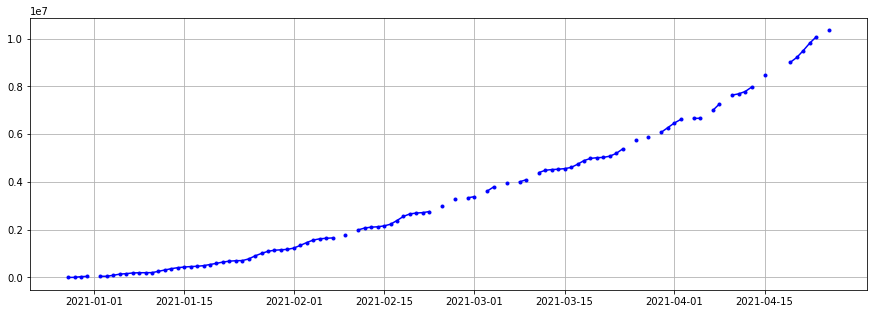




people_vaccinated


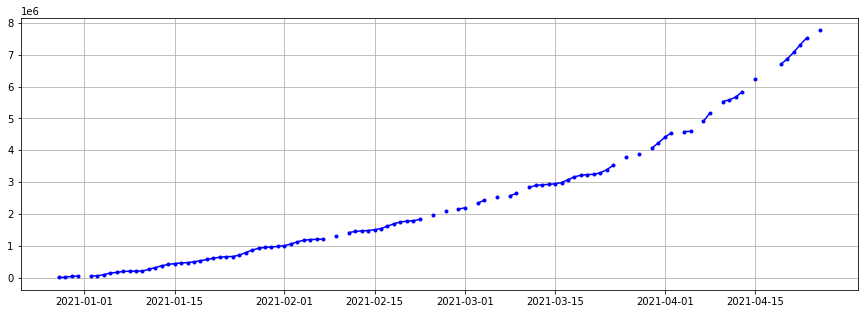




people_fully_vaccinated


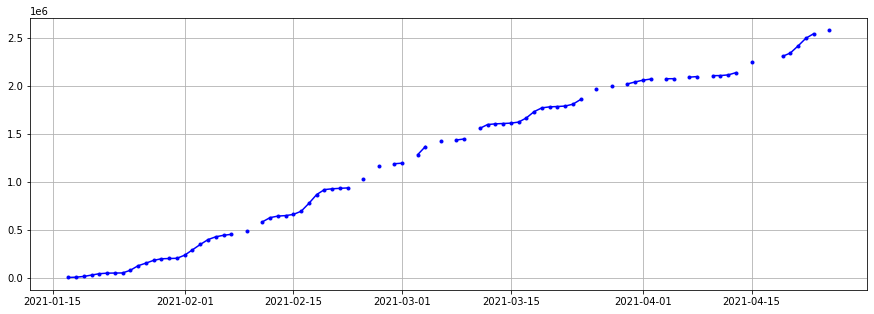




new_vaccinations


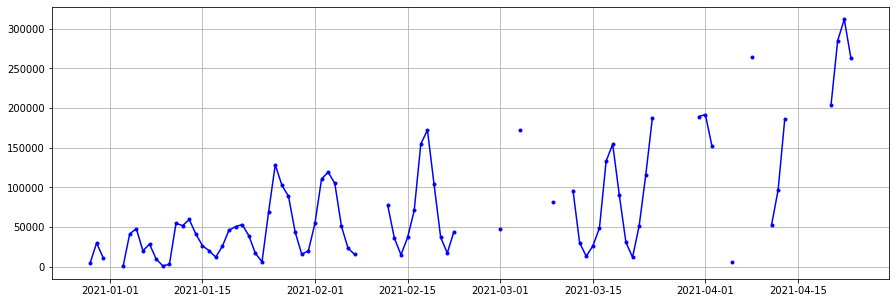




total_vaccinations_per_hundred


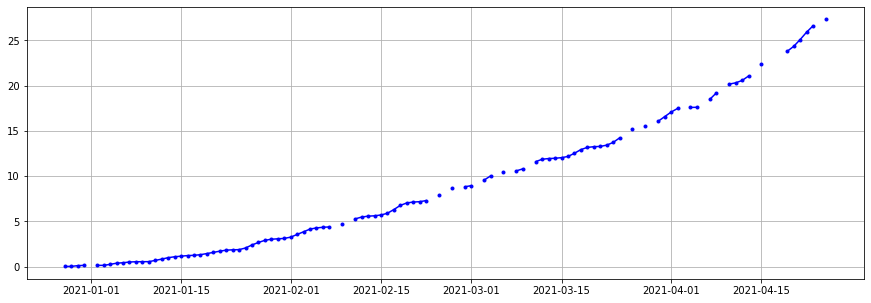




people_vaccinated_per_hundred


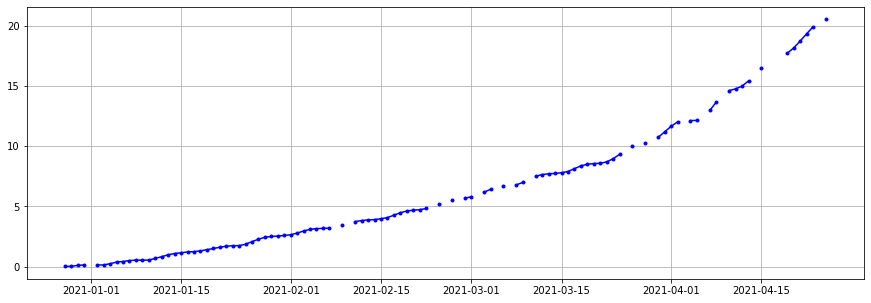




people_fully_vaccinated_per_hundred


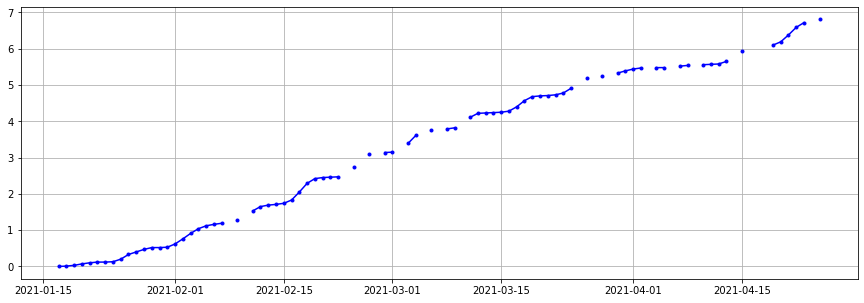

In [10]:
analyse_country(data, 'Poland')

In [11]:
def compare_countries(data, countries):
    data_countries = [(data[data['location']==country].drop('location', axis=1), country) for country in countries]
    for c in data_countries[0][0].columns:
        print(c)
        plt.figure(figsize=(15,5))
        for data, country in data_countries: 
            plt.plot(data[c], '.', label=country)
        plt.grid()
        plt.legend()
        plt.show()
        print('\n\n')

total_cases


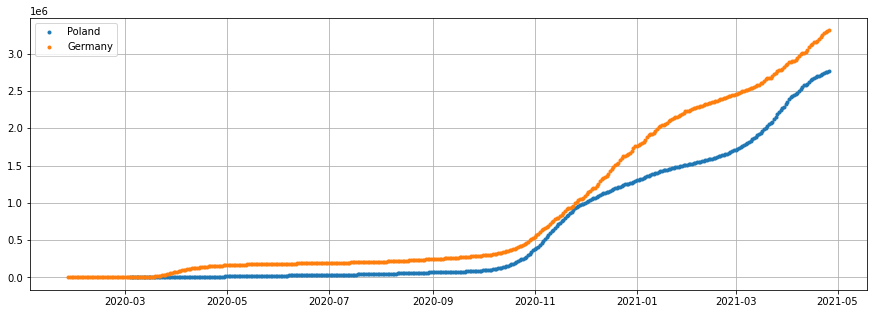




new_cases


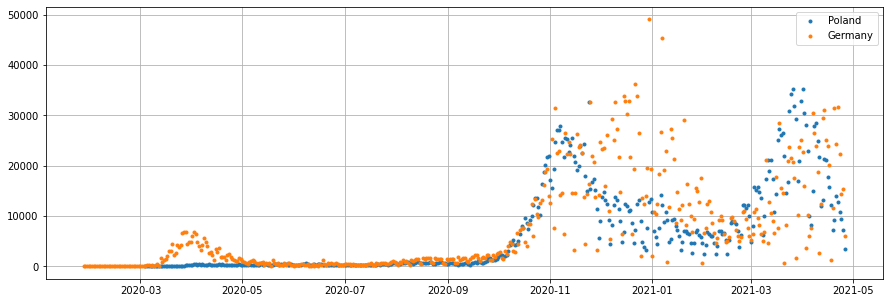




total_deaths


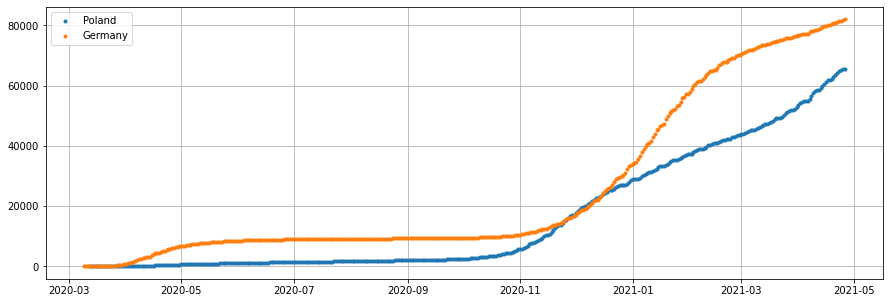




new_deaths


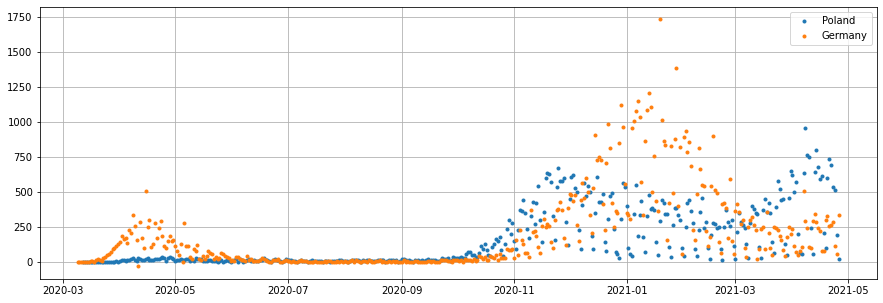




total_cases_per_million


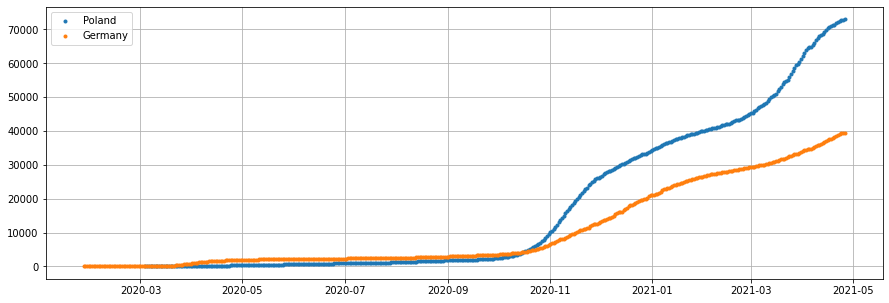




new_cases_per_million


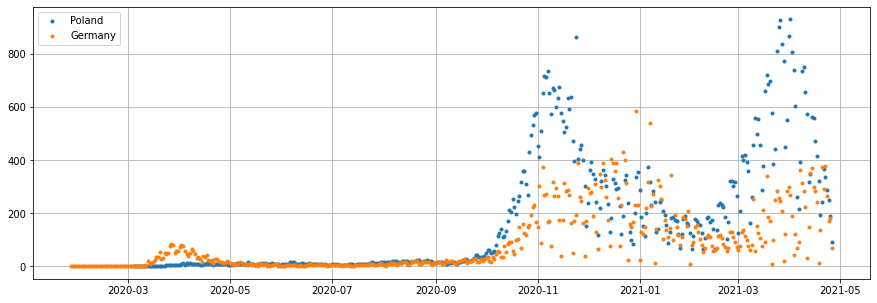




total_deaths_per_million


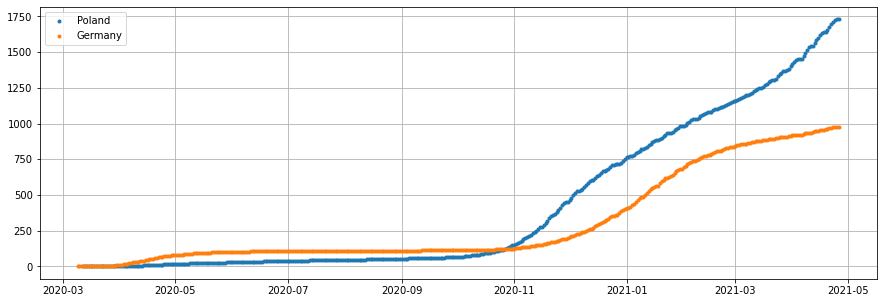




new_deaths_per_million


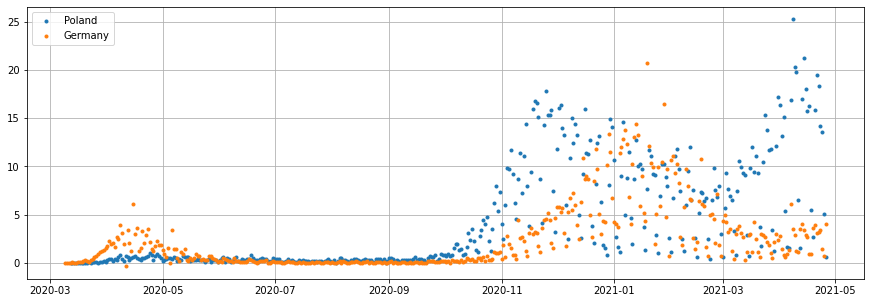




weekly_hosp_admissions


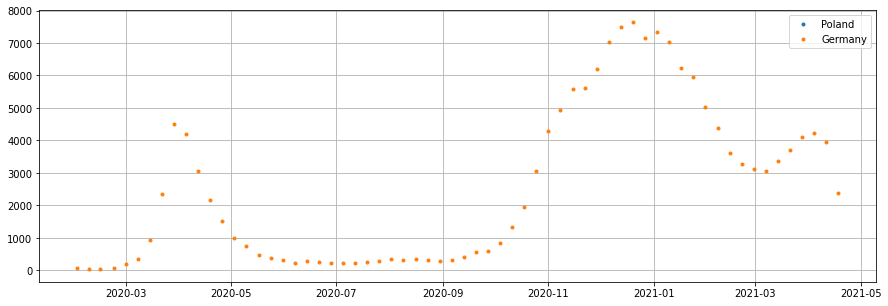




weekly_hosp_admissions_per_million


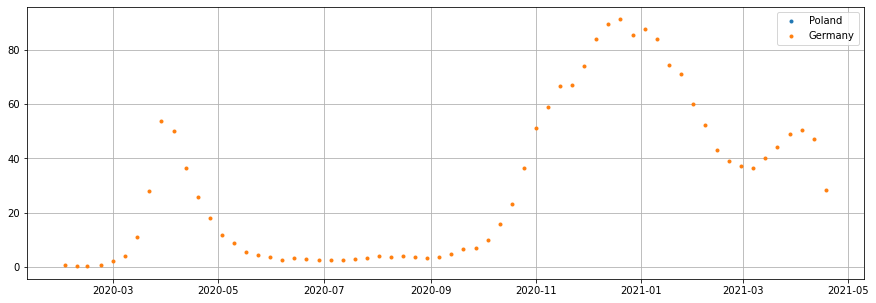




new_tests


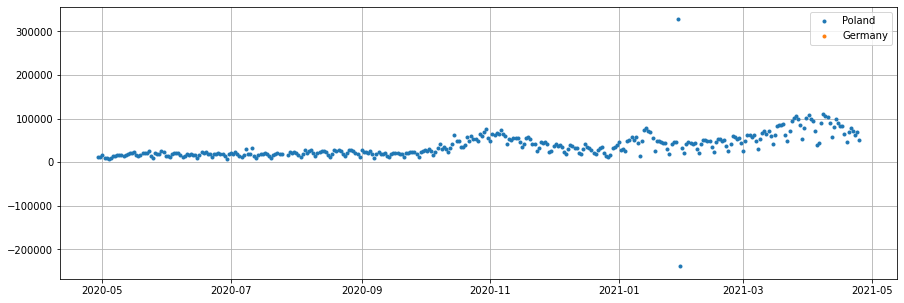




total_tests


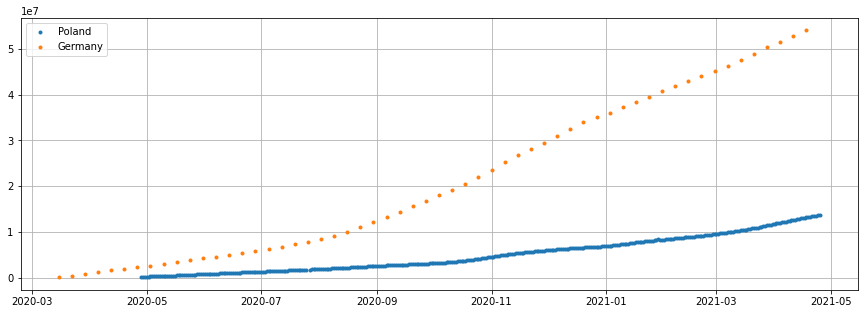




total_tests_per_thousand


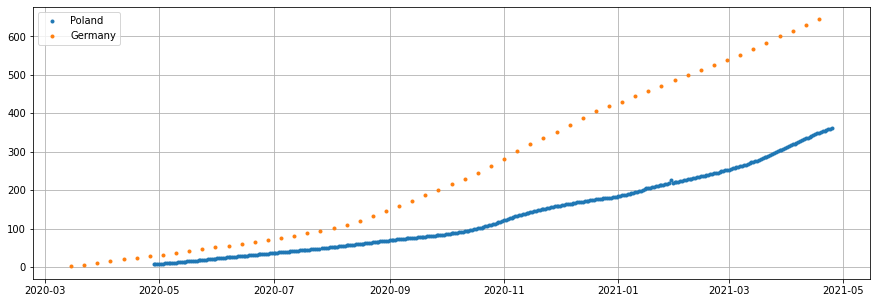




new_tests_per_thousand


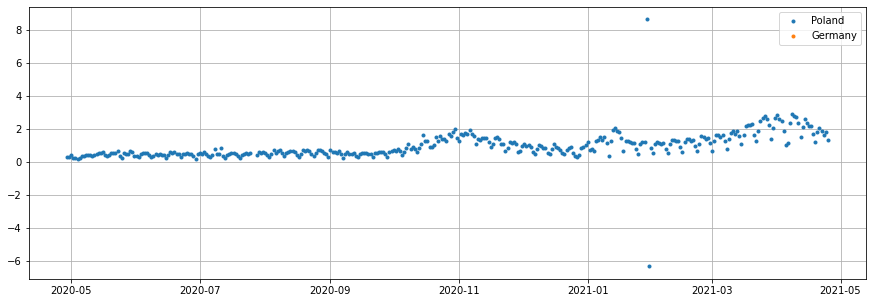




positive_rate


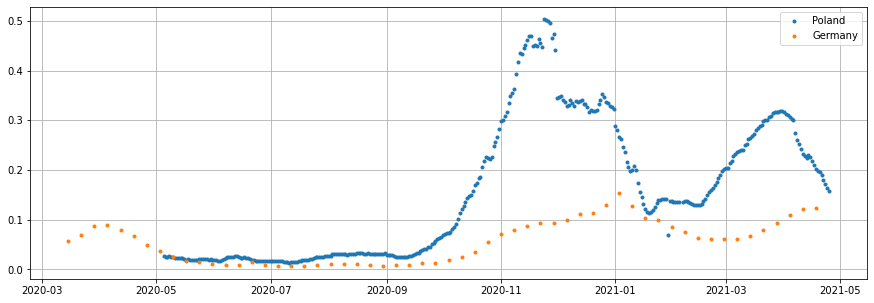




tests_per_case


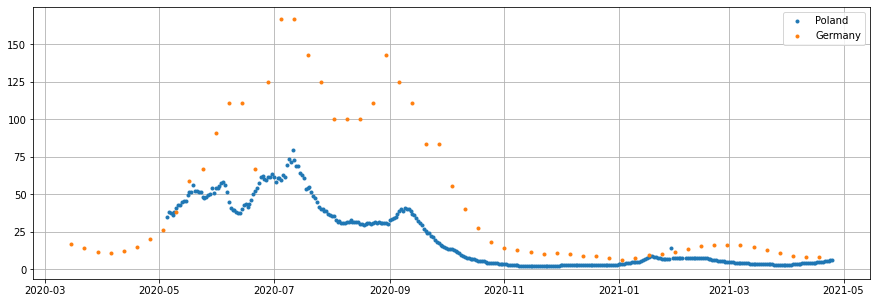




total_vaccinations


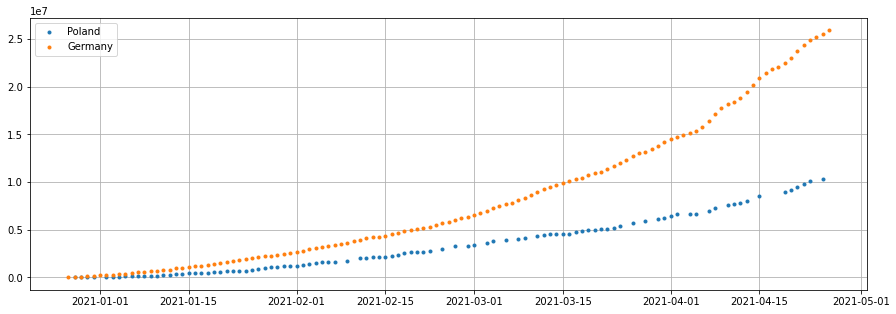




people_vaccinated


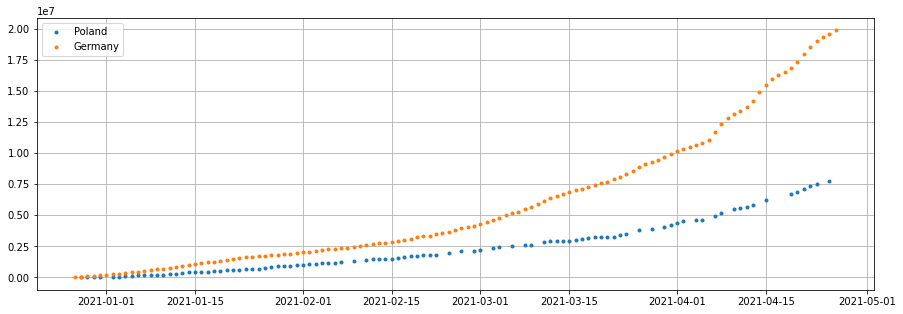




people_fully_vaccinated


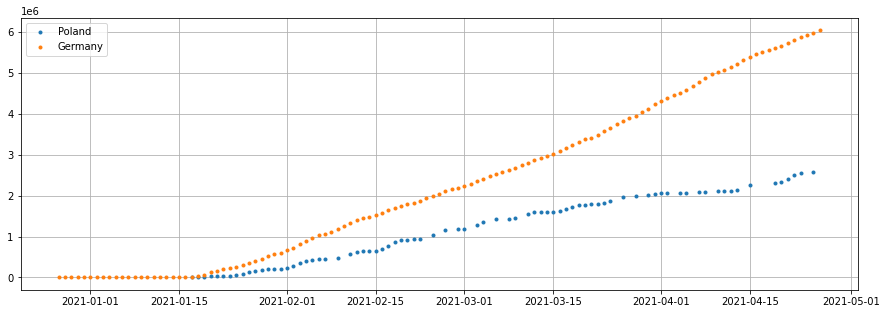




new_vaccinations


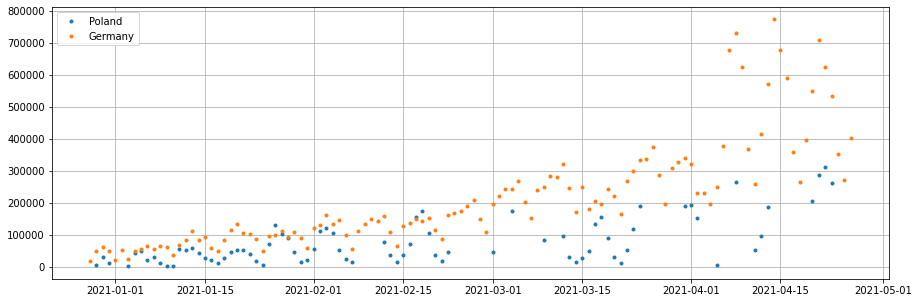




total_vaccinations_per_hundred


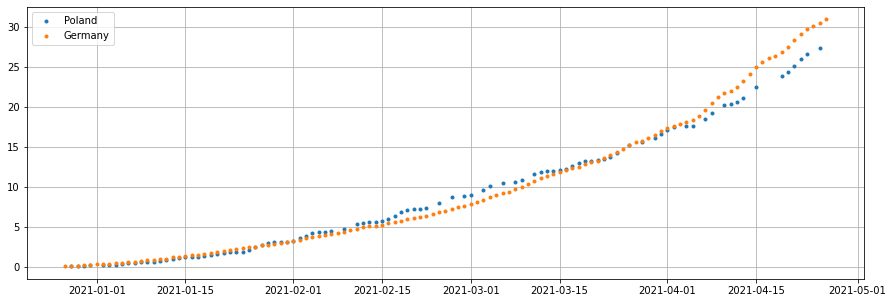




people_vaccinated_per_hundred


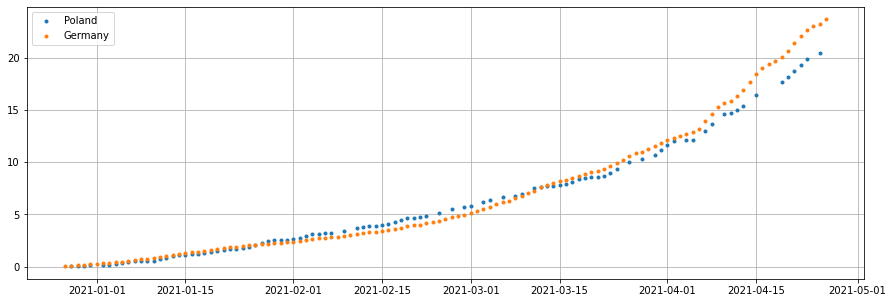




people_fully_vaccinated_per_hundred


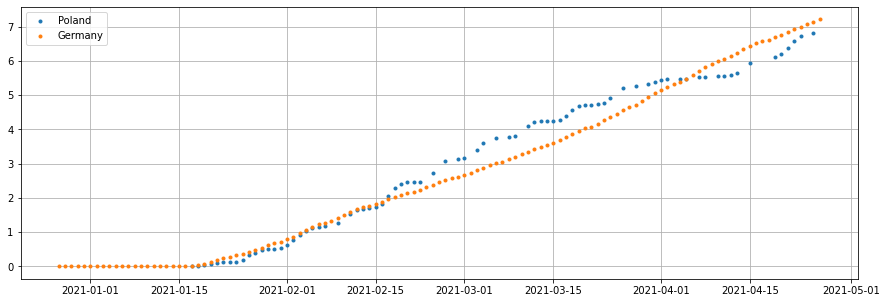

In [12]:
compare_countries(data, ['Poland', 'Germany'])

In [13]:
data_country = data[data['location']=='Poland']

In [14]:
x = data_country['new_cases']/data_country['new_tests']

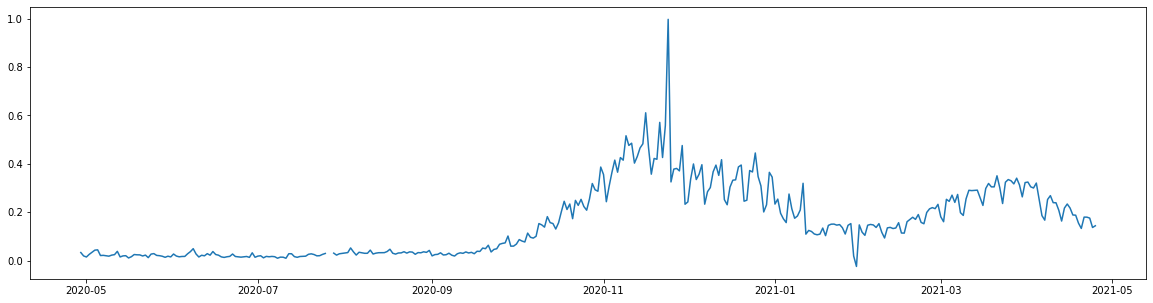

In [15]:
plt.figure(figsize=(20,5))
plt.plot(x)

# Prediction test

In [16]:
from statsmodels.tsa.arima.model import ARIMA